# Homework 7: Confidence Intervals

**Reading**: Textbook chapter [13](https://umass-data-science.github.io/190fwebsite/textbook/13/estimation/).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 7 is due **Wednesday, 11/09 at 8:000am**. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write out explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [6]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

import otter
grader = otter.Notebook()

## 1. Plot the Vote


Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters* - the proportion of the vote that each candidate received from the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [7]:
votes = Table().with_column('vote', np.array(['C']*470 + ['T']*380 + ['J']*80 + ['S']*30 + ['U']*40))
num_votes = votes.num_rows
votes.sample()

vote
T
T
T
T
T
C
C
T
T
C


**Question 1.** Below, complete the given  code that will use 5000 different bootstrapped samples from `votes` to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**. Make sure that you understand what's going on here. It may be helpful to explain `proportions_in_resamples` to a friend or TA.

*Hint:* Go back and read this part of chapter 13 https://umass-data-science.github.io/190fwebsite/textbook/13/2/bootstrap/

In [9]:
def proportions_in_resamples(votes):
    prop_c = make_array()
    for i in np.arange(5000):
        #bootstrap should be an array of 1000 randomly sampled values from votes
        bootstrap = votes.sample().column('vote')
        single_proportion = np.count_nonzero(bootstrap == 'C') / len(bootstrap)
        prop_c = np.append(prop_c, single_proportion)
    return prop_c

proportions_in_resamples(votes)

array([0.486, 0.464, 0.492, ..., 0.487, 0.472, 0.452])

In [10]:
grader.check("q1.1")

q1.1 results: All test cases passed!

In the following cell, we run the function you just defined, `proportions_in_resamples`, and create a histogram of the calculated statistic for the 5,000 bootstraps. Based on what the original polling proportions were, does the graph seem reasonable? Talk to a friend or ask a TA if you are unsure!

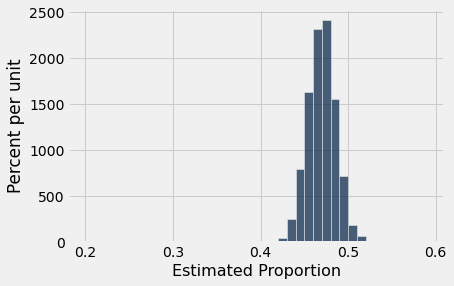

In [11]:
sampled_proportions = proportions_in_resamples(votes)
Table().with_column('Estimated Proportion', sampled_proportions).hist(bins=np.arange(0.2,0.6,0.01))

**Question 2.** Using the array `sampled_proportions`, find the values that bound the middle 95% of the values in the data. (Compute the lower and upper ends of the interval, named `c_lower_bound` and `c_upper_bound`, respectively.) *Hint:* Use the percentile function https://umass-data-science.github.io/190fwebsite/resources/

In [12]:
c_lower_bound = percentile(2.5, sampled_proportions)
c_upper_bound = percentile(97.5, sampled_proportions)
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(c_lower_bound, c_upper_bound))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.439000, 0.501000]


In [13]:
grader.check("q1.2")

q1.2 results: All test cases passed!

**Question 3.** What does the interval you have just found represent?

The actual proportion of voters who voted for candidate C lies in the calculated confidence interval with 95% probability

<!-- END QUESTION -->

**Question 4.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use CI's to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Plot a histogram of the the resulting samples.

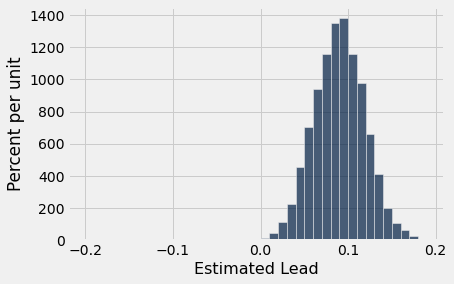

In [14]:
bins = np.arange(-0.2,0.2,0.01)

def c_lead_in_resamples(votes):
    leads = make_array()
    for i in np.arange(5000):
        bootstrap = votes.sample().column('vote')
        single_lead = (np.count_nonzero(bootstrap == 'C') - np.count_nonzero(bootstrap == 'T')) / len(bootstrap)
        leads = np.append(leads, single_lead)
    return leads

sampled_leads = c_lead_in_resamples(votes)
Table().with_column('Estimated Lead', sampled_leads).hist(bins=bins)

In [15]:
diff_lower_bound = percentile(2.5, sampled_proportions)
diff_upper_bound = percentile(97.5, sampled_proportions)
print("Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [0.439000, 0.501000]


In [16]:
grader.check("q1.4")

q1.4 results: All test cases passed!

## 2. Interpreting Confidence Intervals


The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.439, .5]$$

(Your answer might have been different; that doesn't mean it was wrong.)

**Question 1**
Can we say that 95% of the population lies in the range $[.439, .5]$? Explain your answer. 

No, this just means that there's a 95% chance that the true proportion is between .439 and .5

<!-- END QUESTION -->

**Question 2**
Can we say that there is a 95% probability that the interval [.439, .5] contains the true proportion of the population who is voting for Candidate C? Explain your answer.

Yes, that's what the interval means

<!-- END QUESTION -->

**Question 3**
Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) and created a 95% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population?

0.95 * 10,000 = 9,500

<!-- END QUESTION -->

**Question 4** The staff also created 80%, 90%, and 99% confidence intervals from one sample, but we forgot to label which confidence interval represented which percentages! Match the interval to the percent of confidence the interval represents. (Write the percentage after each interval below.) **Then**, explain your thought process.

<!-- BEGIN QUESTION -->

$[.444,.495]$: 90

$[.450,.490]$: 80

$[.430,.511]$: 99
The bigger the interval, the greater the % of confidence.

<!-- END QUESTION -->

Recall the second bootstrap confidence interval you created, estimating Candidate C's lead over Candidate T. Among voters in the sample, her lead was .09. The staff's 95% confidence interval for her true lead (in the population of all voters) was

$$[.032,.15].$$

Suppose we are interested in testing a simple yes-or-no question:

> "Are the candidates tied?"

Our null hypothesis is that the proportions are equal, or, equivalently, that Candidate C's lead is exactly 0. Our alternative hypothesis is that her lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the staff's 95% confidence interval.


****Question 5** :** Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

*Hint:* If you're confused, take a look at [this chapter](https://umass-data-science.github.io/190fwebsite/textbook/13/4/using-confidence-intervals/) of the textbook.

Reject

<!-- END QUESTION -->

**Question 6** What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Unable to tell using our staff confidence interval

<!-- END QUESTION -->

**Question 7** What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Reject

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [17]:
grader.check_all()

q1.1 results: All test cases passed!

q1.2 results: All test cases passed!

q1.4 results: All test cases passed!